In [92]:
%matplotlib inline
import numpy as np
from matplotlib import rc
# rc('text', usetex=True)
rc('font', **{'size' : 20})

# Вычислительная математика

## Итерационные методы

## Прямые и итерационные методы решения СЛАУ

Решаем систему $A x = b$

**Прямые методы (метод Гаусса, Холецкого, QR разложение)**
* Позволяют за конечное число шагов в точной арифметике получить точное решение

**Итерационные методы**
* Строится последовательность приближенных решений, которая сходится к точному. На каждом шаге получаем *конечную ошибку*.

## Зачем нужны итерационные методы?

* Прямые методы имеют сложность $\mathcal{O}(n^3)$
* Сложно распараллеливаются
* Не все прямые методы способны учитывать особенную структуру матриц. Например: если $A$ - разреженная, матрицы $L$ и $U$ не обязательно будут разреженными

## Потеря разреженности

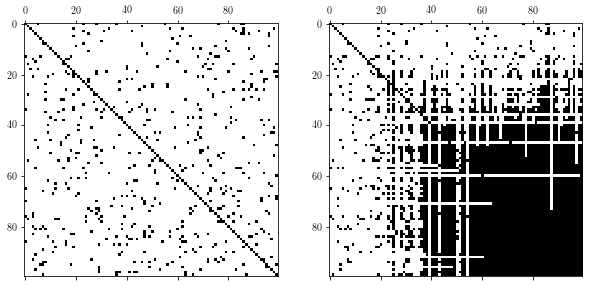

In [93]:
%matplotlib inline 
import numpy as np
from scipy import sparse, linalg
from matplotlib import pyplot as plt

n = 100
A = sparse.random(n, n, 0.05) + np.eye(n)
LU,piv = linalg.lu_factor(A)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.spy(A)
ax2.spy(LU)

## Итерационные методы

* Общая идея: построить последовательность $x^{(k)}$, которая сходится к точному решению

Преимущества итерационных методов:
1. Каждый шаг метода использует только матрично-векторное умножение. Сложность $\mathcal{O}(K n ^2)$, где $K$ - число итераций.
2. Нет необходимости работать с элементами матрицы $A$, достаточно иметь процедуру - "черный ящик" - которая вычисляет произведение матрицы на вектор.
3. Матрично-векторное умножение легко распараллеливается с высокой эффективностью
4. Не всегда нужно вычислять решение системы *точно*. В итерационных методах из оценки ошибки по заданной точности можно вычислить число итераций. При небольшой точности можно уменьшить объем вычислений.


## Метод Ричардсона (метод простой итерации)

* Рассмотрим систему $A x = f, \; A = A^T > 0$:
$$
\begin{align}
& A x = f \\
& \tau (Ax - f) = 0 \\ 
& x - \tau (Ax - f) = x \\
& \boxed{x^{(k+1)} = x^{(k)} - \tau (A x^{(k)} -f)  = (I - \tau A) x^{(k)} + \tau f}
\end{align}
$$
$\tau$ - итерационный параметр.
* 
$$ 
\begin{align}
\left\{\begin{array}{ccc}
& x^{(k+1)} &=& (I - \tau A) x^{(k)} + \tau f \\
& x &=& (I - \tau A) x + \tau f
\end{array}\right.
\end{align} \Rightarrow x^{(k+1)} - x = e^{(k+1)} = (I - \tau A) e^{(k)} \Rightarrow  \Vert e^{(k+1)}\Vert = \Vert (I - \tau A)\Vert \Vert e^{(k)} \Vert \le \Vert (I - \tau A)\Vert^{k+1} \Vert e^{(0)} \Vert 
$$
* Обозначим $\mu_k$ - собственные числа матрицы $B = I - \tau A$, $\lambda_k$ - с.ч. $A$.  
 Тогда $\mu_k = 1 - \tau \lambda_k$, критерий сходимости метода $\rho (B) = \max_k |1 -\tau\lambda_k| < 1$. 
* Т.к. $\lambda_k >0$, при $0 < \tau < 2/\lambda_{max}$ метод сходится.

## Метод простой итерации, оптимальный параметр

* Т.к. $A$ и $B = I - \tau A$ - нормальные матрицы, мы знаем точный характер убывания ошибки:
$$
B = U \Lambda U^* \; \Rightarrow \Vert B^n e^{(0)} \Vert = \Vert U \Lambda U^* U \Lambda U^* \ldots U \Lambda U^* e^{(0)} \Vert = \Vert U \Lambda^n U^* e^{(0)} \Vert = \Vert \Lambda^n e^{(0)} \Vert \le \max_k |1 -\tau \lambda_k|^n \Vert e^{(0)} \Vert
$$
Другая точка зрения: разложим ошибку по ортонормированному базису из с.в. матрицы $B$:
$$
e^{(0)} = \sum_k c_k u_k \Rightarrow B e^{(0)} = \sum_k \mu_k c_k u_k \Rightarrow B^n e^{(0)} = \sum_k \mu_k^n c_k u_k
$$
т.е. компонента ошибки вдоль $k$-го вектора убывает как $\mu_k^n$.



## Метод простой итерации, оптимальный параметр

Text(0,0.5,'$1 - \\tau\\lambda$')

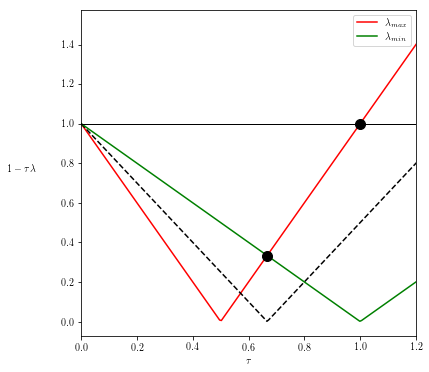

In [94]:
xx = np.linspace(0,1.25,200)
l = np.array([2, 1.5, 1.0])
plt.figure(figsize=(6,6))
plt.plot(xx, np.abs(1 - xx * l[0]), 'r-', label = r'$\lambda_{max}$')
plt.plot(xx, np.abs(1 - xx * l[1]), 'k--')
plt.plot(xx, np.abs(1 - xx * l[2]), 'g-', label = r'$\lambda_{min}$')
plt.plot(xx, np.ones(200), 'k-', lw = 1)
plt.plot((2/3,1), (1/3, 1), 'ko', ms=10 )
plt.xlim(0,1.2)
plt.legend()
plt.xlabel(r'$\tau$')
plt.ylabel(r'$1 - \tau\lambda$', rotation = 0, labelpad = 40)

## Метод простой итерации, оптимальный параметр
* Оптимальное значение:
$$
\begin{align}
& \tau_{opt} = \frac{2}{\lambda_{min} + \lambda_{max}} \Rightarrow \\
& \Vert B \Vert_2 = q_{opt} = \frac{\lambda_{max} - \lambda_{min}}{\lambda_{max} + \lambda_{min}} = \frac{\lambda_{max}/\lambda_{min} - 1}{\lambda_{max}/\lambda_{min} + 1} = \frac{cond_2(A) -1}{cond_2(A) + 1}
\end{align}
$$
* **Скорость сходимость зависит от числа обусловленности**

## Метод простой итерации, чебышёвские параметры
* Простая идея обобщения: менять параметр от итерации к итерации
* Как будет меняться ошибка:
$$
e^{(k+1)} = (I - \tau_k A) (I - \tau_{k-1} A ) \ldots (I - \tau_0 A) e^{(0)} = p(A) e^{(0)}
$$
$p$ - полином со свойством $p(0) = 1$
* Для минимизации ошибки после $n$ шагов нужно подобрать многочлен $p$ так, чтобы $\Vert p(A)\Vert_2 \to \min$
* Для нормальной матрицы $A = A^T > 0$:
$$
\Vert p(A)\Vert_2 = \Vert U p(\Lambda) U^*\Vert_2= \Vert p(\Lambda) \Vert_2 = \max_k \vert p(\lambda_k) \vert \le \max_{\lambda_{min} \le \lambda \le \lambda_{max}} \vert p(\lambda) \vert
$$
* В итоге нужно найти многочлен степени  $n$ $p: p(0) = 1$ и $\max_{\lambda_{min} \le \lambda \le \lambda_{max}} \vert p(\lambda) \vert$ минимален среди всех таких многочленов:
$$
p = \arg \min_{p \in \mathcal{P}^n, \; p(0) =1} \left( \max_{[\lambda_{min}, \lambda_{max}]}  \vert p(\lambda) \vert\right)
$$

## Метод простой итерации, чебышёвские параметры, многочлены Чебышёва

* Точное решение этой задачи - многочлены Чебышёва. Эти многочлены являются *наименее уклоняющимися от нуля на $[-1,1]$*


1. $T_n(x) = \cos(n \; \arccos x)$
2. Реккурентное соотношение: $T_n = 2xT_{n-1} - T_{n-1},\; T_0(x) = 1, \; T_1(x) = x$
3. $\vert T_n(x) \vert \le 1, \; x \in [-1,1]$, старший коэффициент $2^{n-1}$
3. $T_n$ имеет $n+1$ *точек альтернанса*: в них многочлен принимает значения $\pm 1$, причем знаки чередуются
3. $T_n$ имеет $n$ различных действительных корней:
$$
x_k = \cos \frac{\pi (2k+1)}{2n}, k = 1, \ldots, n-1
$$


Text(0.5,1,'Interval $x\\in[-1.1, 1.1]$')

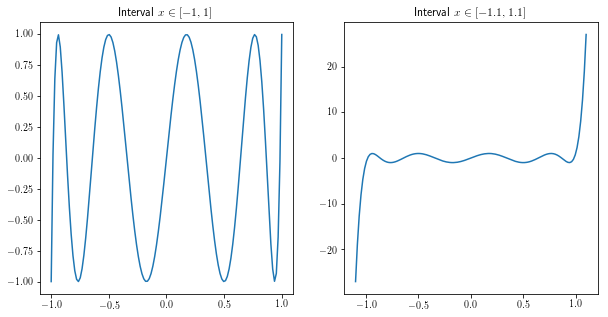

In [95]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x1 = np.linspace(-1, 1, 128)
x2 = np.linspace(-1.1, 1.1, 128)
p = np.polynomial.Chebyshev((0, 0, 0, 0, 0, 0, 0, 0, 0, 1), (-1, 1)) 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.plot(x1, p(x1))
ax1.set_title('Interval $x\in[-1, 1]$')
ax2.plot(x2, p(x2))
ax2.set_title('Interval $x\in[-1.1, 1.1]$')

## Метод простой итерации, чебышёвские параметры

* $p(x) = (1 - \tau_k x) \ldots (1 - \tau_0 x )$ , т.е. $1/\tau_k$ - корни многочлена.
* Сделаем замену переменных
$$
x(\lambda) = -1 + 2 \frac{\lambda - \lambda_{min}}{\lambda_{max} - \lambda_{min}}
$$
* Тогда оптимальный набор параметров:
$$
\tau_i = \frac{2}{ \lambda_{max} + \lambda_{min} - (\lambda_{max} - \lambda_{min})x_i}, \; x_i = \cos \frac{\pi(2i+1)}{2n}, \; i = 1, \ldots, n
$$
* Скорость сходимости:
$$
e^{(k)} \le C q^k e^{(0)}, \; q = \frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A) + 1}}
$$

## Квадратичные функционалы и линейные системы

* Рассмотрим фукнционал $f(x) = \frac{1}{2} (Ax, x) - (b,x) = \frac{1}{2} x^T A x - x^T b$
* Градиент и матрица вторых производных (гессиан)
$$\nabla f(x) = Ax - b, \quad \nabla^2 f = \frac{\partial^2 f} {\partial x_i \partial x_j} = A$$
* Если $A = A^T >0$, то функционал имеет единственный минимум $z: Az = b$ $\Rightarrow$
* Решение СЛАУ можно свести к задаче минимазации функционала. Очевидная идея - градиентный спуск:
$$
x_{k+1} = x_k - \tau \nabla f(x_k) = x_k - \tau (A x_k - b) 
$$
это в точности метод простой итерации

## Методы Якоби и Зейделя

* Общий подход для построения итерационного метода: представим матрицу $A$ в виде $A = M - N$, где $M$ - обратимая и легко обращается (можно быстро решить систему с такой матрицей), тогда 
$$
x = M^{-1}(N x + b) \Rightarrow x^{(k+1)} = M^{-1}(N x^{(k)} + b)
$$
* Примеры матриц, которые легко обращаются:
    * Диагональные
    * Треугольные


* Рассмотрим представление $A = L + D + U$, $L$ - строго нижнетреугольная часть, $D$ - диагональная часть, $U$ - строго верхнетреугольная часть.
    1. Метод Якоби $x^{(k+1)} = D^{-1} ( -(L+ U) x^{(k)} + b)$  
    Достаточное условие сходимости: строчное диагональное преобладание (тогда $\Vert D^{-1}(L + U) \Vert_\infty < 1$)
    2. Метод Зейделя: $x^{(k+1)} = (L + D)^{-1} ( -U x^{(k)} + b)$  
    Достаточное условие сходимости: $A = A^T > 0$
* Эти методы редко используются в "чистом виде", но часто являются составными частями более сложных методов

## Вычисление собственных чисел и собственных векторов матрицы

Степенной метод:  
* Пусть $A$ имеет базис из нормированных с.в. $z_i, \; A z_i = \lambda_i z_i, \Vert z_i \Vert = 1$ и $$\vert \lambda_1\vert > \vert \lambda_2 \vert \ldots > \vert \lambda_n \vert$$



* Возьмем $y_0 = c_1 z_1 + \ldots c_n z_n \Rightarrow$
$$y_k = A^k y_0 = c_1 \lambda_1^k z_1 + \ldots + c_n \lambda_n^k z_n = c_1 \lambda_1^k \left(z_1 + \mathcal{O}\left(\bigg\vert\frac{ \lambda_2}{\lambda_1}\bigg\vert^k\right)\right)$$

* тогда 
$$\frac{y_k^* A y_k}{\Vert y_k \Vert^2} = \frac{(c_1 \lambda_1^k z_1^*)\lambda_1 (c_1 \lambda_1^k z_1) }{(c_1 \lambda_1^k)^2} + \mathcal{O}\left(\bigg\vert\frac{ \lambda_2}{\lambda_1}\bigg\vert^k\right) \to \lambda_1 $$

## Алгоритм степенного метода
* Добавляем нормировки на каждом шаге:
    1. Начальное приближение $y_0$. $x_0 = y_0 /\Vert y_0 \Vert$
    2. $y_k = A x_{k-1}, \; x_k = y_k/\Vert y_k \Vert, \quad k = 1,2, \ldots$
    3. $x^*_k A x_k \to \lambda_1$



* Наиболее популярный метод вычисления с. ч. основан на $QR$-разложении